In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimp
import seaborn as sns
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras import metrics
from keras import regularizers
from keras import optimizers
from keras import backend as K
from keras.wrappers.scikit_learn import KerasRegressor

In [3]:
train=pd.read_csv('/home/siddharth/Documents/ml data/digit recognition/train.csv')
train.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [4]:
Ytrain=train['label']
Xtrain=train.drop(['label'],axis=1)

In [5]:
Xtrain.isnull().any()

pixel0      False
pixel1      False
pixel2      False
pixel3      False
pixel4      False
            ...  
pixel779    False
pixel780    False
pixel781    False
pixel782    False
pixel783    False
Length: 784, dtype: bool

In [7]:

Xtrain=Xtrain/255

In [8]:
#one-hot encoding the labels
Ytrain=pd.get_dummies(Ytrain)
Ytrain.head()

,0,1,2,3,4,5,6,7,8,9
0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0


In [9]:
seed=2
Xtrain,Xval,Ytrain,Yval=train_test_split(Xtrain,Ytrain,test_size=0.25,random_state=seed)

In [24]:
def create_model():
    model=Sequential()
    model.add(Dense(512,input_shape=(784,),activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model.add(Dense(512,activation='relu'))
    model.add(Dense(10))
    adam = optimizers.Adam(lr=0.01)
    model.compile(optimizer= adam ,loss = 'mean_squared_error', metrics =['accuracy'])
    
    return model


In [25]:
model=create_model()
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [26]:
history = model.fit(Xtrain, Ytrain, validation_data=(Xval,Yval), epochs=20, batch_size=128)

Train on 31500 samples, validate on 10500 samples
Epoch 1/20
31500/31500 [==============================] - 7s 231us/step - loss: 0.6054 - accuracy: 0.8304 - val_loss: 0.1908 - val_accuracy: 0.8144
Epoch 2/20
31500/31500 [==============================] - 7s 234us/step - loss: 0.1273 - accuracy: 0.8868 - val_loss: 0.0893 - val_accuracy: 0.8741
Epoch 3/20
31500/31500 [==============================] - 10s 302us/step - loss: 0.0674 - accuracy: 0.8869 - val_loss: 0.0577 - val_accuracy: 0.8532
Epoch 4/20
31500/31500 [==============================] - 9s 281us/step - loss: 0.0422 - accuracy: 0.8893 - val_loss: 0.0398 - val_accuracy: 0.8606
Epoch 5/20
31500/31500 [==============================] - 9s 289us/step - loss: 0.0316 - accuracy: 0.8916 - val_loss: 0.0293 - val_accuracy: 0.8920
Epoch 6/20
31500/31500 [==============================] - 10s 311us/step - loss: 0.0276 - accuracy: 0.8935 - val_loss: 0.0292 - val_accuracy: 0.8693
Epoch 7/20
31500/31500 [==============================] - 11

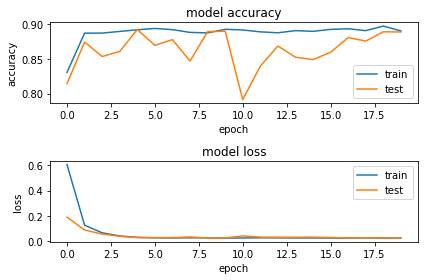

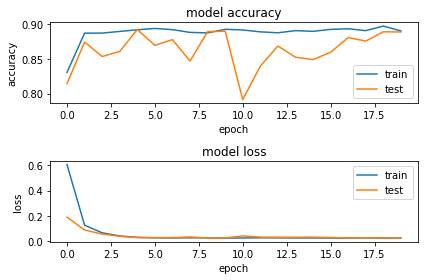

In [27]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

fig

## Working on testing data

In [28]:
test=pd.read_csv('/home/siddharth/Documents/ml data/digit recognition/test.csv')

In [29]:
test.isnull().any()

pixel0      False
pixel1      False
pixel2      False
pixel3      False
pixel4      False
            ...  
pixel779    False
pixel780    False
pixel781    False
pixel782    False
pixel783    False
Length: 784, dtype: bool

In [30]:
##Normalizing data
test=test/255
test.shape

(28000, 784)

In [33]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
pred=model.predict(test)

In [43]:
pred = np.argmax(pred,axis = 1)
pred = pd.Series(pred,name="Label")
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),pred],axis = 1)

In [44]:
submission.to_csv('submission.csv',index=False)